# Домашнее задание
>отбой по квантовым вычислениям, это ужас какой-то, везде отсутствует доступ из России.
>
>тогда задание такое:
>1. взять датасет из открытого доступа.
>2. исследовать его свойства и характеристики.
>3. применить различные модели машинного обучения.
>4. сделать выводы по работе.
>
>тут прикапываться к точности модели не буду вообще, главное - показать что какое-то понимание имеется и есть попытки самостоятельно что -то сделать новое.

Задача, которую мы будем решать - преобразование градусов Цельсия в градусы Фаренгейта. Формула преобразования выглядит следующим образом:

$$ f = c \times 1.8 + 32 $$

Будем использовать два датасета. У нас будут входные значения градусов Цельсия (0, 8, 15, 22, 38) и их соответствующие градусы по Фаренгейту (32, 46, 59, 72, 100). Затем мы натренируем модель таким образом, чтобы та примерно соответствовала приведённой выше формуле.

# Импорт зависимостей

Первым делом импортируем TensorFlow и NumPy. Мы так же настраиваем уровень логгирования - только ошибки.

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np

# Подготовим данные для тренировки

In [ ]:
celsius_q    = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

for i,c in enumerate(celsius_q):
  print("{} градусов Цельсия = {} градусов Фаренгейта".format(c, fahrenheit_a[i]))

-40.0 градусов Цельсия = -40.0 градусов Фаренгейта
-10.0 градусов Цельсия = 14.0 градусов Фаренгейта
0.0 градусов Цельсия = 32.0 градусов Фаренгейта
8.0 градусов Цельсия = 46.0 градусов Фаренгейта
15.0 градусов Цельсия = 59.0 градусов Фаренгейта
22.0 градусов Цельсия = 72.0 градусов Фаренгейта
38.0 градусов Цельсия = 100.0 градусов Фаренгейта


# Создаём модель

Задача достаточно простая - сеть будет состоять из единственного слоя с единственным нейроном. 

**Строим сеть**

Мы назовём слой `l0` (**l**ayer и ноль) и создадим его, инициализировав `tf.keras.layers.Dense` со следующими параметрами:

* `input_shape=[1]` - определяет размерность входного параметра - единичное значение. Массив размером $ 1 \times 1 $ с единственным значением. Так как это первый (и единственный) слой, то и размерность входных данных соответствует размерности всей модели. Единственное значение - значение с плавающей запятой, представляющее градусы Цельсия.

* `units=1` - определяет количество нейронов в слое.

In [ ]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

### Преобразуем слои в модель

`Sequential`-модель принимает в качестве аргументов перечень слоёв в том порядке в котором их необходимо применять - от входного значения до выходного значения.

У нашей модели всего один слой - `l0`.

In [ ]:
model = tf.keras.Sequential([l0])

## Компилируем модель с функцией потерь и оптимизаций

Перед тренировкой модель должна быть скомпилирована (собрана). При компиляции для тренировки необходимы:

* **функция потерь** - способ измерения того, насколько далеко предсказываемое значение от желаемого выходного значения (измеримая разница называется "потерей").

* **функция оптимизации** - способ корректировки внутренних переменных для уменьшения потерь.

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

Функция потерь - среднеквадратичная ошибка.
Функция оптимизации - Adam.
Коэффициент скорости обучения (learning rate) равен `0.1`.

### Тренируем модель

Этот цикл вычислений, сравнений и корректировки контролируется внутри метода `fit`. Первый аргумент - входные значения, второй аргумент - желаемые выходные значения. Аргумент `epochs` определяет какое количество раз этот обучающий цикл должен быть выполнен. Аргумент `verbose` контролирует уровень логгирования.

In [ ]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Завершили тренировку модели")

Завершили тренировку модели


### Отображаем статистику тренировок

Для визуализации воспользуемся `Matplotlib`. Мы можем наблюдать что наша модель улучшается очень быстро в самом начале, а затем приходит к стабильному и медленному улучшению до тех пор, пока результаты не становятся "около"-идеальными в самом конце обучения.

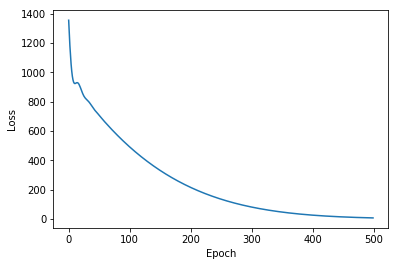

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'])

### Используем модель для предсказаний

Теперь у нас есть модель, которая была обучена на входных значениях `celsius_q` и выходных значениях `fahrenheit_a` для определения взаимосвязи между ними. Мы можем воспользоваться методом предсказания для вычисления тех значений градусов Фаренгейта по которым ранее нам неизвестны были соответствующие градусы Цельсия.

Например, сколько будет `100.0` градусов Цельсия по Фаренгейту.

In [ ]:
print(model.predict([100.0]))

[[211.33786]]


Правильный ответ $100 \times 1.8 + 32 = 212$.

### Ревью

* Мы создали модель с использованием Dense-слоя
* Мы обучили её на 3500 примерах (7 пар значений, 500 обучающих итераций)

Наша модель подогнала значения внутренних переменных (весов) в Dense-слое таким образом, чтобы возвращать правильные значения градусов Фаренгейта на произвольное входное значение градусов Цельсия. 